In [17]:
import matplotlib
import math

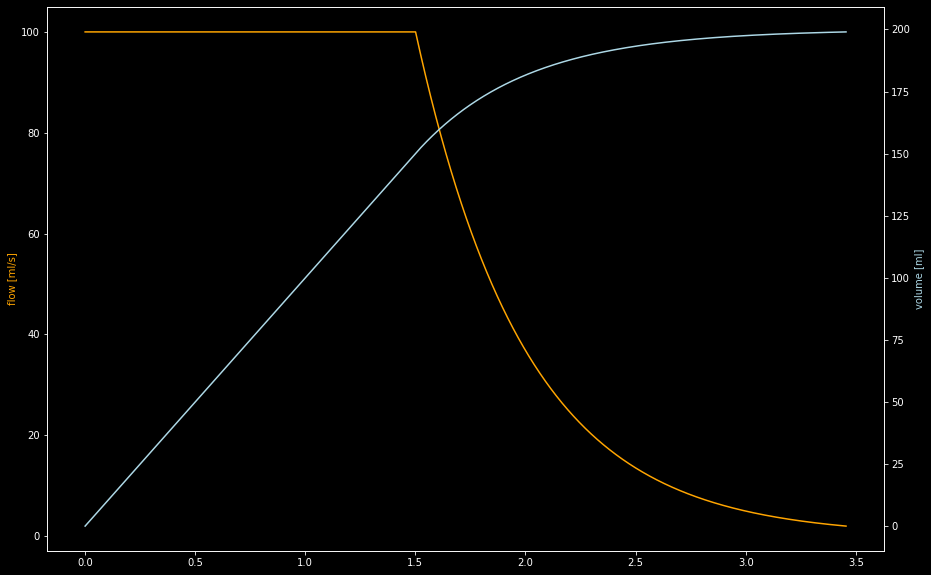

In [101]:
time_step = 1e-3 # s
time = 0 # s
volume = 0 # ml
flow = 0 # ml/s

target_volume = 200
max_flow = 100
flow_acc = 100
stopping_volume = 50

V = []
F = []
T = []
for i in range(20000000):
    
    # flow control
    
    # if volume < target_volume/2:
    #     flow += flow_acc * time_step
    #     if flow > max_flow: flow = max_flow
    
    ramp_up = min(time * flow_acc, max_flow)
    ramp_up = max_flow
    k = 0
    flow = ramp_up - (max(0, max(0, volume-target_volume+stopping_volume)/stopping_volume))*max_flow
    volume += time_step * flow
        
    time += time_step
    
    V.append(volume)
    F.append(flow)
    T.append(time)
    
    if volume - target_volume > -1:
       break

fig, ax1 = plt.subplots(figsize=(15,10))
color = 'lightblue'
ax2 = ax1.twinx()
ax2.set_xlabel('time [s]')
ax2.set_ylabel('volume [ml]', color=color)
ax2.plot(T, V, color=color)
color = 'orange'
ax1.set_ylabel('flow [ml/s]', color=color)
ax1.plot(T, F, color=color)
    